In [1]:
# allows plots to be plotted right below the cell when run
%matplotlib inline 
import serial # the library for reading from serial com ports
import numpy as np # naming convention for numpy library
import matplotlib.pyplot as plt # naming convention for matplotlib
from scipy.fftpack import fft, ifft # import discrete fourier transform and its inverse

In [71]:
device = "COM8" # com port of Arduino
baud = 115200
ser = serial.Serial(device, baud, timeout=10)

In [72]:


raw_data = []
while (len(raw_data) < 2000): # adjust this line to read in more/less data
    data = ser.readline()
    raw_data.append(data)
ser.close()



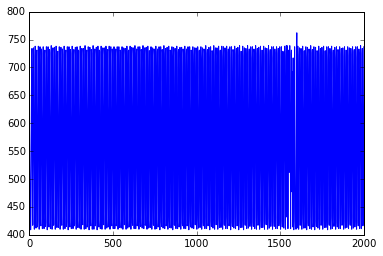

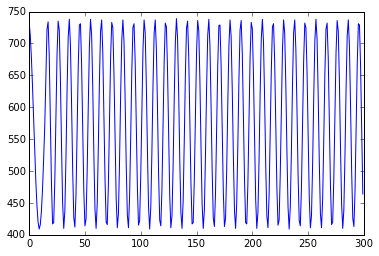

In [40]:
with open("raw_data.txt", "w") as data:
    for i in raw_data:
        data.writelines(str(i)+'\n')
with open("raw_data.txt", "r") as raw_data_txt:
    loaded_data = raw_data_txt.readlines()
    
signal = loaded_data
plt.plot(signal[0:len(signal)])
plt.figure()
plt.plot(signal[:300])

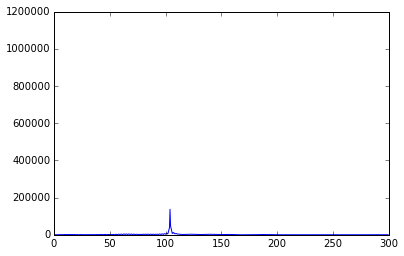

In [42]:
dft = fft(signal)
fs = 1000
N = len(dft)
freqs = [i*fs/N for i in range(N)]
plt.plot(freqs[0:600], np.abs(dft[0:600]))